# Počítačový návrh léčiv, 5. cvičení
Jiří Reiniš

In [7]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole

from rdkit import DataStructs

In [4]:
suppl = Chem.SDMolSupplier("../../data/drugbank.sdf")
drugbank = [m for m in suppl if m]

RDKit WARNING: [14:08:27]  S group DAT ignored on line 2516
RDKit WARNING: [14:08:27]  S group DAT ignored on line 2516
RDKit WARNING: [14:08:27]  S group DAT ignored on line 2516
RDKit WARNING: [14:08:27]  S group DAT ignored on line 2516
RDKit WARNING: [14:08:27]  S group DAT ignored on line 15552
RDKit WARNING: [14:08:27]  S group DAT ignored on line 15552
RDKit WARNING: [14:08:27]  S group DAT ignored on line 15552
RDKit WARNING: [14:08:27]  S group DAT ignored on line 15552
RDKit ERROR: [14:08:27] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:08:27] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [14:08:27] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [14:08:27] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [14:08:27]  S group GEN ignored on line 102860
RDKit ERROR: [14:08:27] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:08:27]  Unhand

RDKit ERROR: [14:08:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [14:08:28] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:08:28] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [14:08:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:08:28] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [14:08:28] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [14:08:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [14:08:28] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [14:08:28] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [14:08:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [14:08:28] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [14:08:29] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:08:29]  Unhandled CTAB feature: S group SRU on line: 754017. Molecule skipped.
RDKit ERROR: [14:08:29] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [14:08:29] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [14:08:29] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [14:08:30]  Unhandled CTAB feature: S group SRU on line: 1148513. Molecule skipped.
RDKit ERROR: [14:08:30] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [14:08:30] ERROR: Could not sanitize molecule ending on line 1151592


In [5]:
morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]

#### Spocitame si vzdalenost dvou fingerprintu ruznymi metrikami:

In [12]:
print(DataStructs.FingerprintSimilarity(morgan_fps[0], morgan_fps[666], metric=DataStructs.TanimotoSimilarity))
print(DataStructs.FingerprintSimilarity(morgan_fps[0], morgan_fps[666], metric=DataStructs.McConnaugheySimilarity))
print(DataStructs.FingerprintSimilarity(morgan_fps[0], morgan_fps[666], metric=DataStructs.DiceSimilarity))

0.14516129032258066
-0.3637042569081404
0.2535211267605634


#### Ukol: pomoci Tanimotovy vzdalenosti vybrat 10 nejblizsich molekul z drugbank pro aspirin

In [14]:
aspirin = Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O")
aspirin_fp = Chem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)

In [15]:
similarities_to_aspirin = [DataStructs.FingerprintSimilarity(x, aspirin_fp, metric=DataStructs.TanimotoSimilarity) for x in morgan_fps ]

In [22]:
similarity_hits=sorted((zip(drugbank, similarities_to_aspirin)), key = lambda x: x[1], reverse=True)

In [61]:
to_draw = similarity_hits[:10]

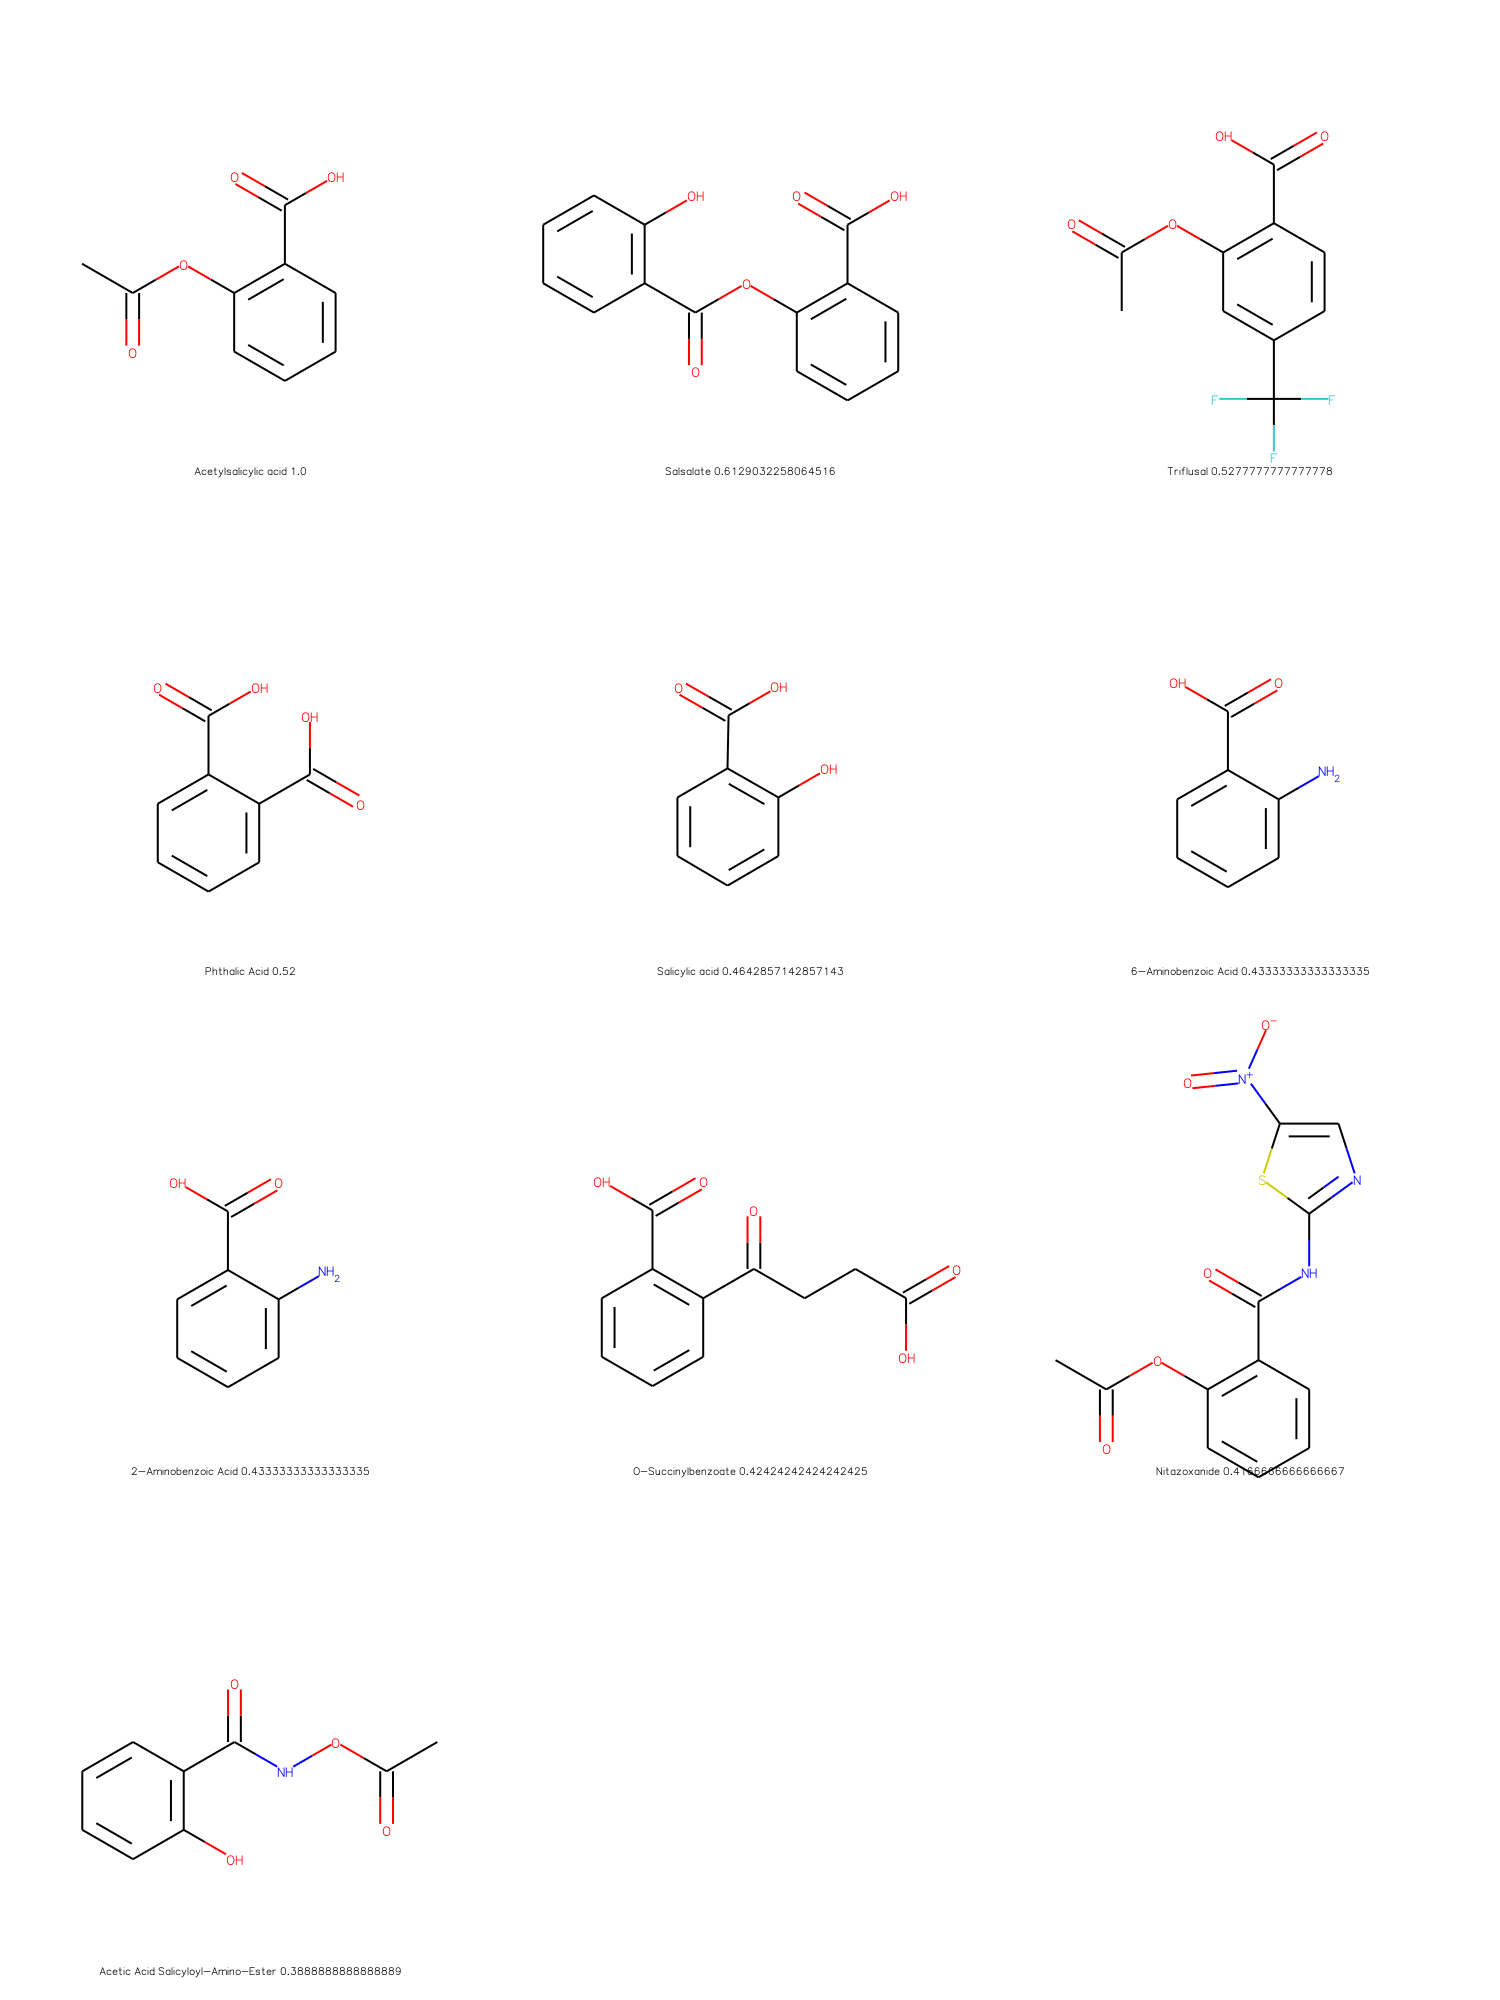

In [62]:
Draw.MolsToGridImage([m[0] for m in to_draw], molsPerRow=3, subImgSize=(500, 500), legends=[m[0].GetProp('GENERIC_NAME')+" "+str(m[1]) for m in to_draw])

#### Ukol2: To same, ale s maccskeys

In [63]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]
aspirin_maccs = MACCSkeys.GenMACCSKeys(aspirin)

In [64]:
similarities_to_aspirin_MACCS = [DataStructs.FingerprintSimilarity(x, aspirin_maccs, metric=DataStructs.TanimotoSimilarity) for x in drugbank_maccs]
similarity_hits_MACCS =sorted((zip(drugbank, similarities_to_aspirin_MACCS)), key = lambda x: x[1], reverse=True)
to_draw_MACCS = similarity_hits_MACCS[:10]

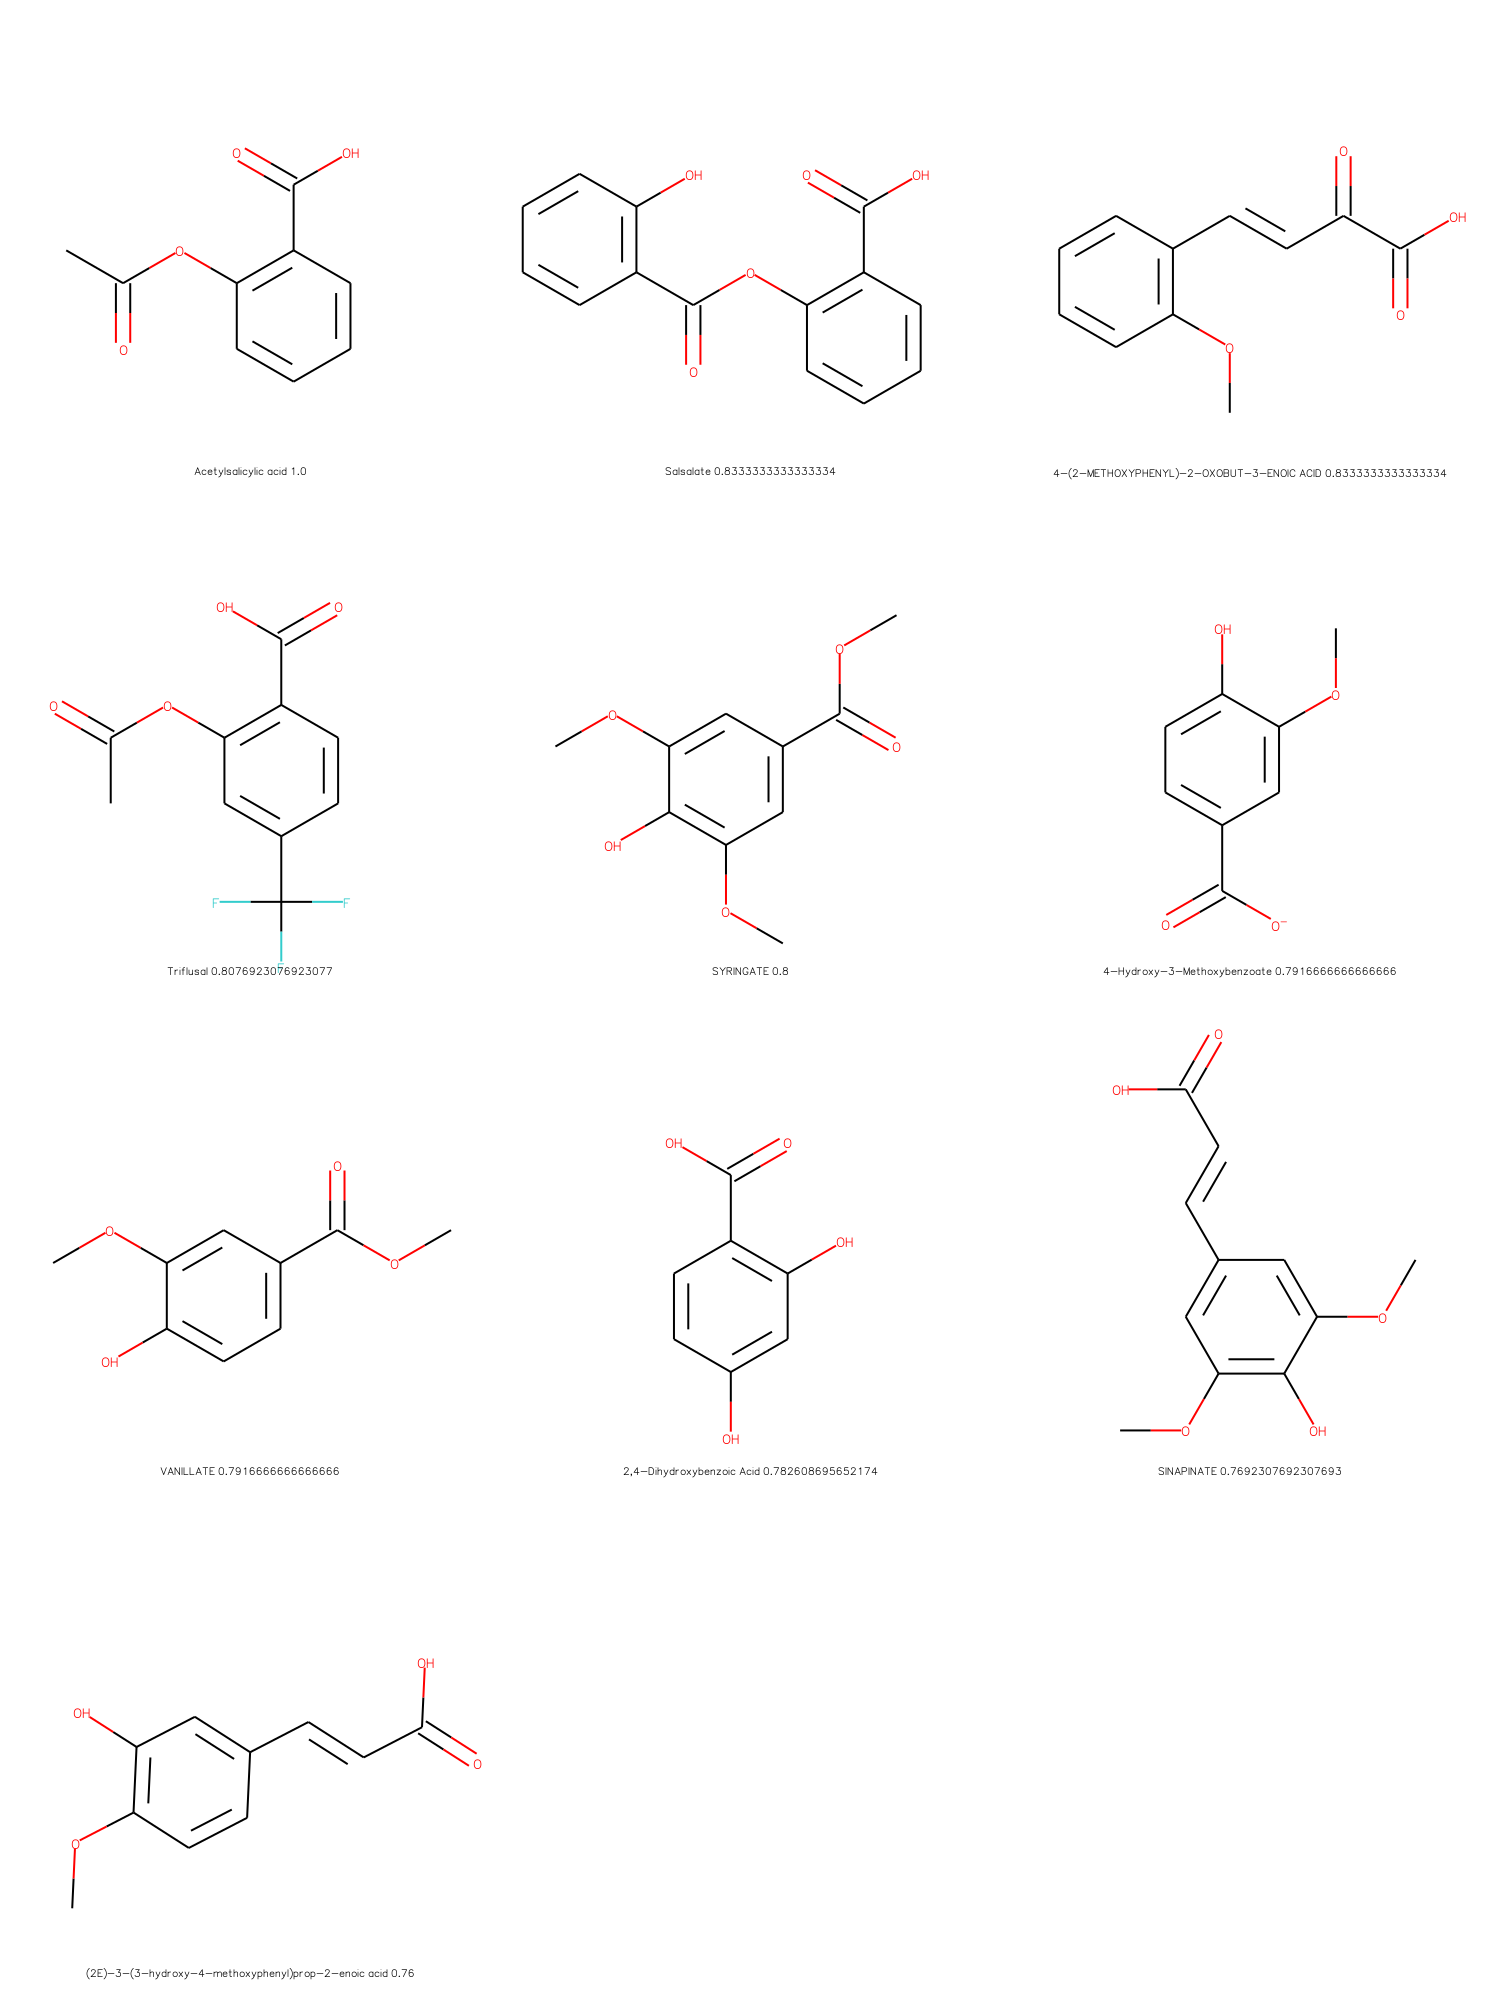

In [65]:
Draw.MolsToGridImage([m[0] for m in to_draw_MACCS], molsPerRow=3, subImgSize=(500, 500),
                     legends=[m[0].GetProp('GENERIC_NAME')+" "+str(m[1]) for m in to_draw_MACCS])

#### Ukol3: udelat diversity picking

In [70]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [87]:
def distance_function(index1, index2, *args, fingerprints=morgan_fps):
    #print(index1, index2)
    return 1 - DataStructs.FingerprintSimilarity(morgan_fps[index1], morgan_fps[index2],
                                                 metric=DataStructs.TanimotoSimilarity)

In [88]:
picker = MaxMinPicker()

In [89]:
picked = list(picker.LazyPick(distance_function, len(morgan_fps), 20, seed=666))

In [90]:
picked_molecules = [drugbank[i] for i in picked]

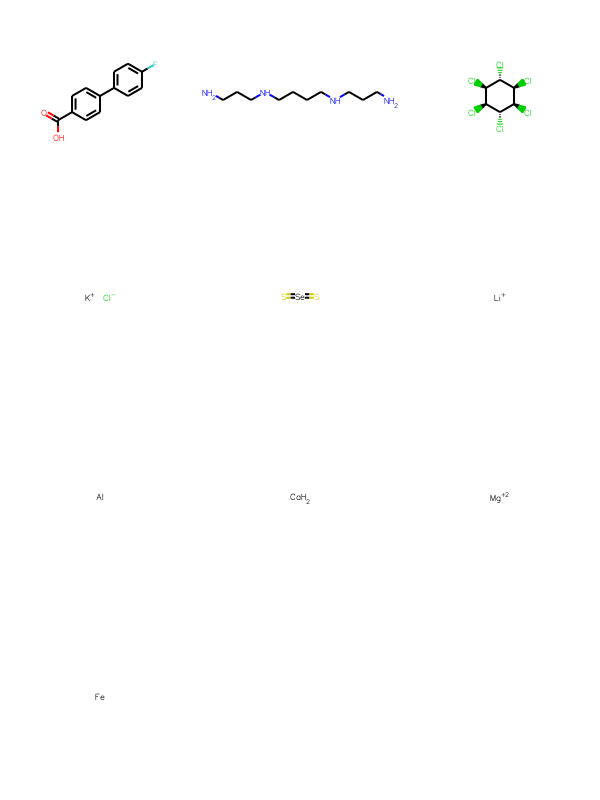

In [96]:
Draw.MolsToGridImage(picked_molecules[:10], molsPerRow=3)

In [95]:
for x in picked_molecules:
    print(x.GetProp('GENERIC_NAME'))

4'-FLUORO-1,1'-BIPHENYL-4-CARBOXYLIC ACID
Spermine
Lindane
Potassium Chloride
Selenium Sulfide
Lithium
Aluminium
Calcium
Magnesium
Iron
Zinc
Tetrahydropyran
Pentasulfide-Sulfur
Tribromomethane
Tetramethylammonium Ion
Perchlorate Ion
(Mu-4-Sulfido)-Tetra-Nuclear Copper Ion
Mercury Diiodide
Aluminum hydroxide
Manganese


tzn vratilo mi to nejaky podivnosti anorganicky, protoze jsou si nejvic vzdaleny  
chceme tedy odstranit anorganicky latky, protoze ty jsou nam uplne k nicemu

#### Ukol4: udelat funkcni diversity picking

In [120]:
carbon = Chem.MolFromSmarts("[#6]")

In [121]:
organic_drugbank = [m for m in drugbank if m.HasSubstructMatch(carbon)]

In [122]:
org_morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in organic_drugbank]

In [123]:
def org_distance_function(index1, index2, *args, fingerprints=org_morgan_fps):
    return 1 - DataStructs.FingerprintSimilarity(org_morgan_fps[index1], org_morgan_fps[index2],
                                                 metric=DataStructs.TanimotoSimilarity)

In [124]:
org_picker = MaxMinPicker()

In [125]:
org_picked = list(org_picker.LazyPick(org_distance_function, len(org_morgan_fps), 20, seed=1234))

In [126]:
org_picked_molecules = [organic_drugbank[i] for i in org_picked]

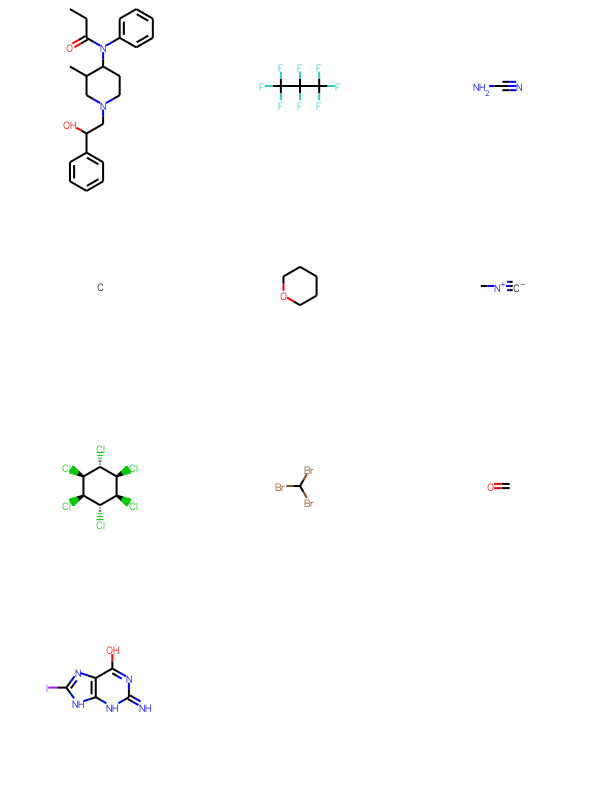

In [127]:
Draw.MolsToGridImage(org_picked_molecules[:10], molsPerRow=3)